# Strategie ewolucyjne

Notebook pokazuje podstawowe mechanizmy strategii ewolucyjnych.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from numba import jit

%matplotlib inline

## Przykładowe problemy testowe

In [35]:
# Sphere function (minimum at 0)
@jit(nopython=True)
def objective_function_F1(X):
    return - np.sum(X**2, axis=1)

# Sphere function - modified
@jit(nopython=True)
def objective_function_F1a(X):
    return - (X[:, 0]**2 + 9*X[:, 1]**2)

# Sphere function - modified
@jit(nopython=True)
def objective_function_F1b(X):
    return - (X[:, 0]**2 + 625*X[:, 1]**2)

# Sphere function - modified
@jit(nopython=True)
def objective_function_F1c(X):
    return - (X[:, 0]**2 + 2*X[:, 1]**2 - 2 * X[:, 0] * X[:, 1])

In [34]:
# Rastrigin function (minimum at 0)
@jit(nopython=True)
def objective_function_F6(X):
    return - 10.0 * X.shape[1] - np.sum(X**2, axis=1) + 10.0 * np.sum(np.cos(2 * np.pi * X), axis=1)

In [33]:
# Schwefel function (minimum at 420.9687)
# (REMARK: should be considered only on [-500, 500]^d, because there are better minima outside)
@jit(nopython=True)
def objective_function_F7(X):
    return - 418.9829 * X.shape[1] + np.sum(X * np.sin(np.sqrt(np.abs(X))), axis=1)

In [32]:
# Griewank function (minimum at 0)
@jit(nopython=True)
def objective_function_F8(X):
    return - 1 - np.sum(X**2 / 4000, axis=1) + np.prod(np.cos(X / np.sqrt(np.linspace(1, X.shape[1], X.shape[1]))), axis=1)

In [8]:
def plot_3D_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(12, 8))
    ax = plt.gca(projection='3d')
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.hot, linewidth=0, antialiased=True)
    plt.title(title)
    plt.show()

In [9]:
def plot_contour_benchmark_function(objective_function, domain_X, domain_Y, title):
    plt.figure(figsize=(9, 9))
    X, Y = np.meshgrid(domain_X, domain_Y)
    Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])
    plt.contour(X, Y, Z, 50)
    plt.title(title)
    plt.show()

/tmp/ipykernel_5215/2867783726.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


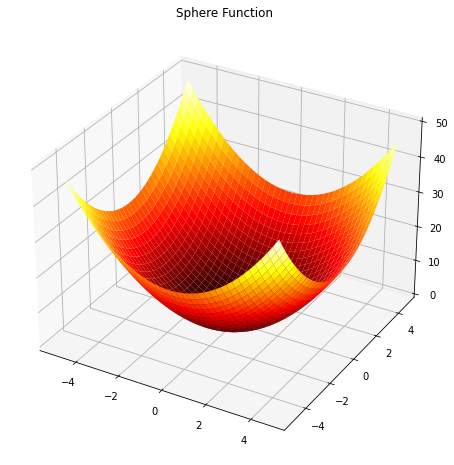

In [11]:
plot_3D_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

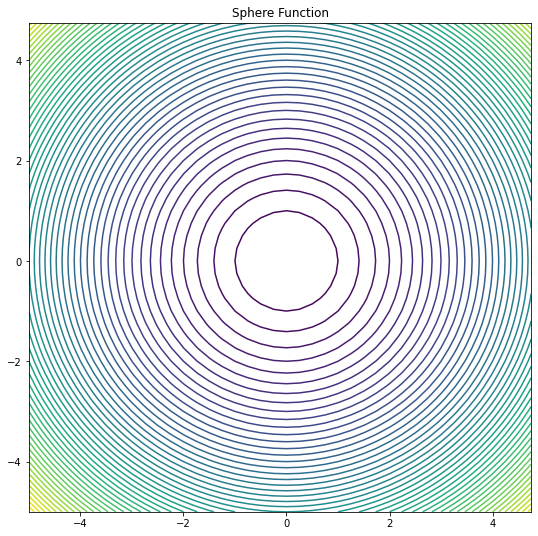

In [12]:
plot_contour_benchmark_function(objective_function_F1, np.arange(-5, 5, 0.25), np.arange(-5, 5, 0.25), 'Sphere Function')

/tmp/ipykernel_5215/2867783726.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(projection='3d')


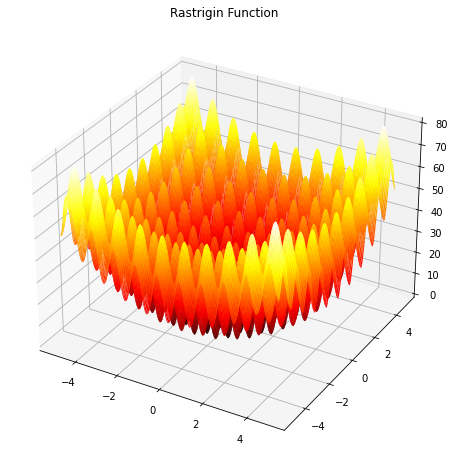

In [13]:
plot_3D_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

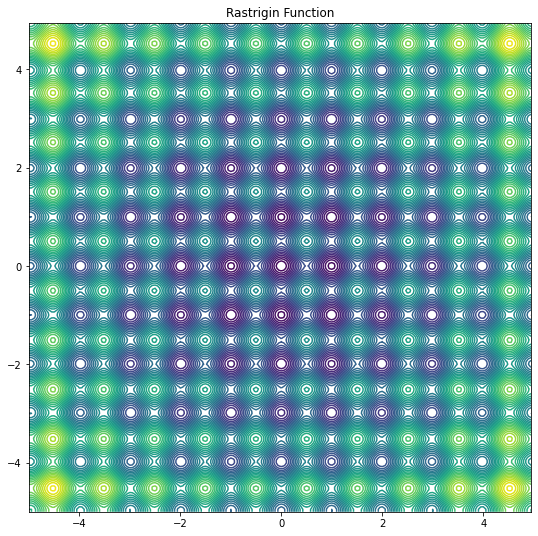

In [14]:
plot_contour_benchmark_function(objective_function_F6, np.arange(-5, 5, 0.05), np.arange(-5, 5, 0.05), 'Rastrigin Function')

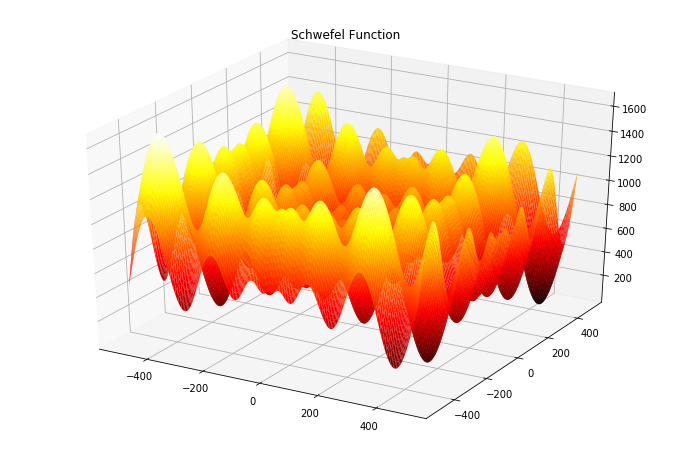

In [12]:
plot_3D_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

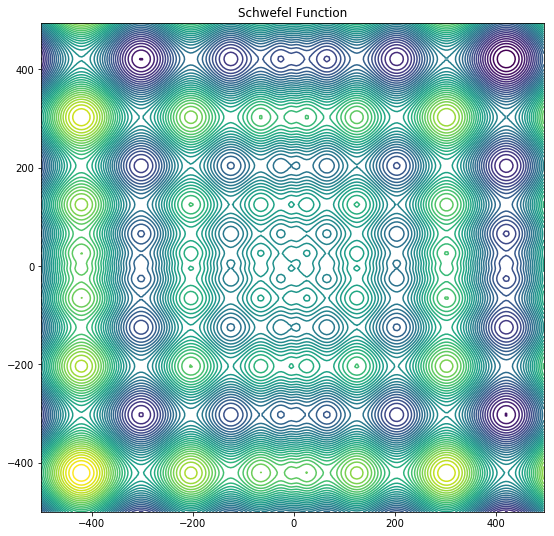

In [13]:
plot_contour_benchmark_function(objective_function_F7, np.arange(-500, 500, 5), np.arange(-500, 500, 5), 'Schwefel Function')

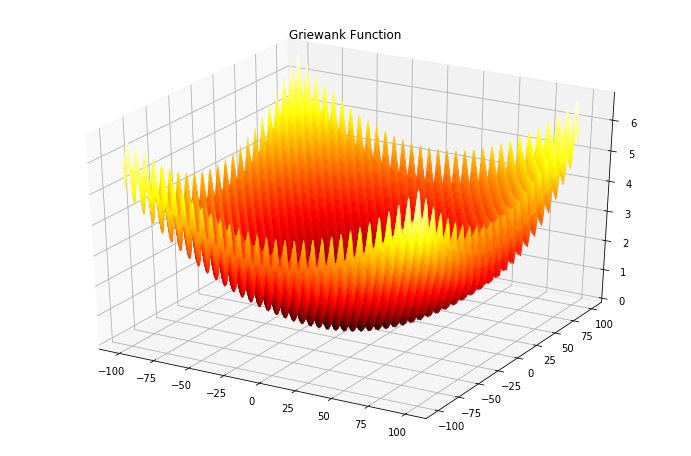

In [14]:
plot_3D_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

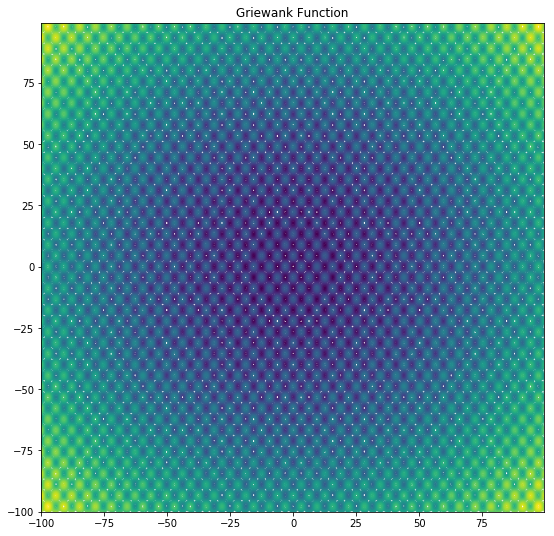

In [15]:
plot_contour_benchmark_function(objective_function_F8, np.arange(-100, 100, 0.5), np.arange(-100, 100, 0.5), 'Griewank Function')

## Przykładowe modele mutacji

In [15]:
N = 250
d = 2

objective_function = objective_function_F1a

original_individual = np.array([[1, 1]])

### Przykład 1:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma^2)$, zaś $\sigma$ jest taka sama dla wszystkich $i = 1, 2, \ldots, d$

In [16]:
sigma = 0.25
mutations = original_individual + sigma * np.random.randn(N, d)

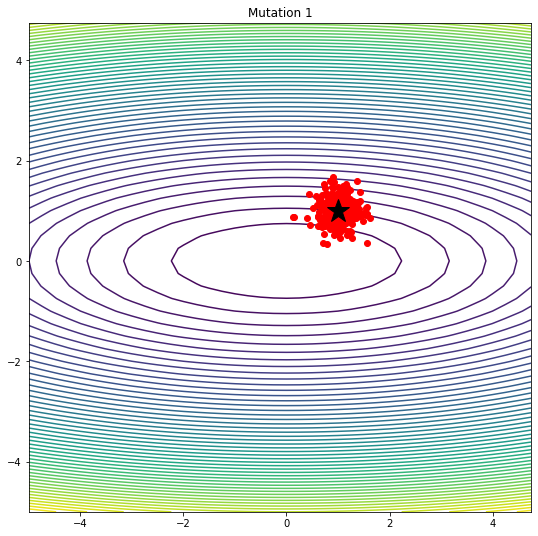

In [17]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 1')
plt.show()

### Przykład 2:

$x_i = x_i + \varepsilon_i$, gdzie $\varepsilon_i$ ma rozkład normalny $\mathcal{N}(0, \sigma_i^2)$, zaś $\sigma_i$ może być różna dla różnych $i = 1, 2, \ldots, d$

In [18]:
sigma = np.array([0.25, 0.5])
mutations = original_individual + sigma * np.random.randn(N, d)

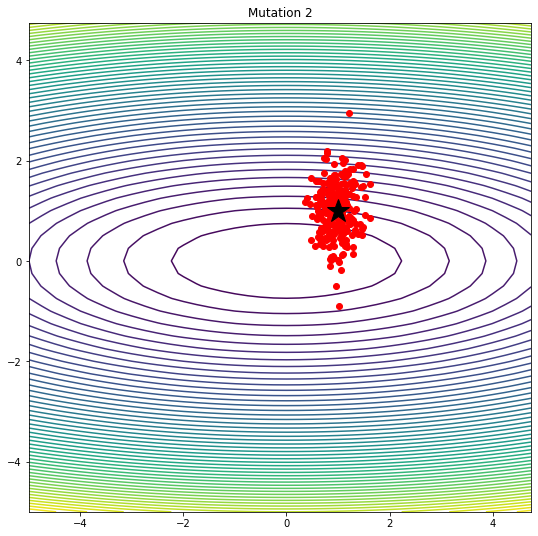

In [19]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 2')
plt.show()

### Przykład 3:

$\mathbf{x} = \mathbf{x} + \boldsymbol{\varepsilon}$, gdzie $\boldsymbol{\varepsilon}$ ma wielowymiarowy rozkład normalny $\mathcal{N}(\mathbf{0}, \boldsymbol{\Sigma})$

In [20]:
S = np.array([[0.25, 0.25],[0.25, 0.5]])
mutations = original_individual + np.dot(np.random.randn(N, d), np.linalg.cholesky(S).T)

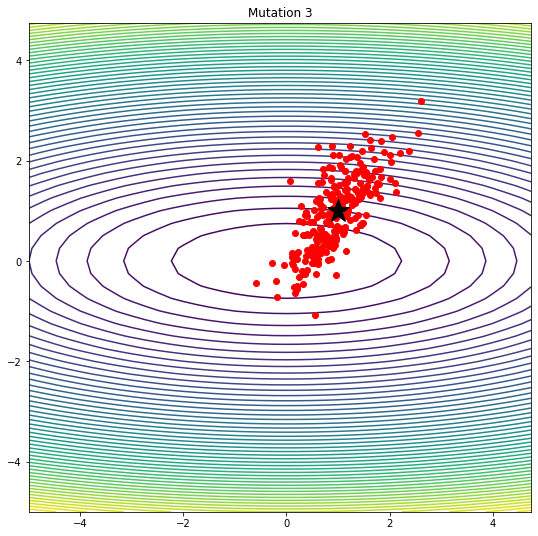

In [21]:
domain_X = np.arange(-5, 5, 0.25)
domain_Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(domain_X, domain_Y)
Z = - objective_function(np.vstack([X.ravel(), Y.ravel()]).T).reshape(X.shape[0], X.shape[1])

plt.figure(figsize=(9, 9))
plt.contour(X, Y, Z, 50)
plt.plot(mutations[:, 0], mutations[:, 1], 'ro')
plt.plot(original_individual[0, 0], original_individual[0, 1], 'k*', markersize=24)
plt.title('Mutation 3')
plt.show()

## Przykładowa strategia ewolucyjna

In [54]:
a = [0,0,0]

for i in range(len(a)):
    a[i] = 1

a

[1, 1, 1]

In [62]:
def is_in_bound(x, min_bound, max_bound):
    for xi in x:
        if xi > max_bound or xi < min_bound:
            return False

    return True

def mutation(P, S, tau, tau0, min_bound, max_bound):
    N = len(P)
    n = len(P[0])

    def mutate_ind(i):
        epsilon0 = np.random.randn() * tau0
        epsilons = np.random.randn(n) * tau
        new_S = S[i] * np.exp(epsilons + epsilon0)
        epsilons = np.random.randn(n) * new_S
        new_P = P[i] + epsilons
        # return fix_mutation(i, new_P, new_S, epsilon0)
        return new_P, new_S

    # def fix_mutation(i, new_P, new_S, epsilon0):
    #     for j in range(len(new_P)):
    #         while (not min_bound <= new_P[j] <= max_bound):
    #             epsilon = np.random.randn() * tau
    #             new_S[j] = S[i][j] * np.exp(epsilon + epsilon0)
    #             epsilon = np.random.randn(n) * new_S[j]
    #             new_P[j] = P[i][j]
    #     return new_P, new_S


    for i in range(N):
        Pi, Si = mutate_ind(i)

        while not is_in_bound(Pi, min_bound, max_bound):
            Pi, Si = mutate_ind(i)

        P[i], S[i] = Pi, Si

def es(objective_function, chromosome_length, population_size, number_of_iterations, number_of_offspring, number_of_parents, sigma, tau, tau_0, log_frequency=1, min_bound=-np.inf, max_bound=np.inf):

    best_solution = np.empty((1, chromosome_length))
    best_solution_objective_value = 0.00

    log_objective_values = np.empty((number_of_iterations, 4))
    log_best_solutions = np.empty((number_of_iterations, chromosome_length))
    log_best_sigmas = np.empty((number_of_iterations, chromosome_length))

    # generating an initial population
    current_population_solutions = 100.0 * np.random.rand(population_size, chromosome_length)
    current_population_sigmas = sigma * np.ones((population_size, chromosome_length))

    # evaluating the objective function on the current population
    current_population_objective_values = objective_function(current_population_solutions)

    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = current_population_objective_values - current_population_objective_values.min()
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = 1.0 / population_size * np.ones(population_size)
        parent_indices = np.random.choice(population_size, (number_of_offspring, number_of_parents), True, fitness_values).astype(np.int64)

        # creating the children population by Global Intermediere Recombination
        children_population_solutions = np.zeros((number_of_offspring, chromosome_length))
        children_population_sigmas = np.zeros((number_of_offspring, chromosome_length))
        for i in range(number_of_offspring):
            children_population_solutions[i, :] = current_population_solutions[parent_indices[i, :], :].mean(axis=0)
            children_population_sigmas[i, :] = current_population_sigmas[parent_indices[i, :], :].mean(axis=0)

        # mutating the children population by adding random gaussian noise
        # children_population_sigmas = children_population_sigmas * np.exp(tau * np.random.randn(number_of_offspring, chromosome_length) + tau_0 * np.random.randn(number_of_offspring, 1))
        # children_population_solutions = children_population_solutions + children_population_sigmas * np.random.randn(number_of_offspring, chromosome_length)

        mutation(children_population_solutions, children_population_sigmas, tau, tau_0, min_bound, max_bound)

        # evaluating the objective function on the children population
        children_population_objective_values = objective_function(children_population_solutions)

        # replacing the current population by (Mu + Lambda) Replacement
        current_population_objective_values = np.hstack([current_population_objective_values, children_population_objective_values])
        current_population_solutions = np.vstack([current_population_solutions, children_population_solutions])
        current_population_sigmas = np.vstack([current_population_sigmas, children_population_sigmas])

        I = np.argsort(current_population_objective_values)[::-1]
        current_population_solutions = current_population_solutions[I[:population_size], :]
        current_population_sigmas = current_population_sigmas[I[:population_size], :]
        current_population_objective_values = current_population_objective_values[I[:population_size]]

        # recording some statistics
        if best_solution_objective_value < current_population_objective_values[0]:
            best_solution = current_population_solutions[0, :]
            best_solution_objective_value = current_population_objective_values[0]
        log_objective_values[t, :] = [current_population_objective_values.min(), current_population_objective_values.max(), current_population_objective_values.mean(), current_population_objective_values.std()]
        log_best_solutions[t, :] = current_population_solutions[0, :]
        log_best_sigmas[t, :] = current_population_sigmas[0, :]

        if np.mod(t, log_frequency) == 0:
            print("Iteration %04d : best score = %0.8f, mean score = %0.8f." % (t, log_objective_values[:t+1, 1].max(), log_objective_values[t, 2]))

    return best_solution_objective_value, best_solution, log_objective_values, log_best_solutions, log_best_sigmas

### Działanie strategii ewolucyjnej dla funkcji sferycznej F1

Iteration 0000 : best score = -8281.81075669, mean score = -26130.71088405.
Iteration 0010 : best score = -37.00080498, mean score = -227.08617158.
Iteration 0020 : best score = -0.09066682, mean score = -0.59002580.
Iteration 0030 : best score = -0.00010604, mean score = -0.00117993.
Iteration 0040 : best score = -0.00000040, mean score = -0.00000241.
Iteration 0050 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = -0.00000000, mean score = -0.00000000.


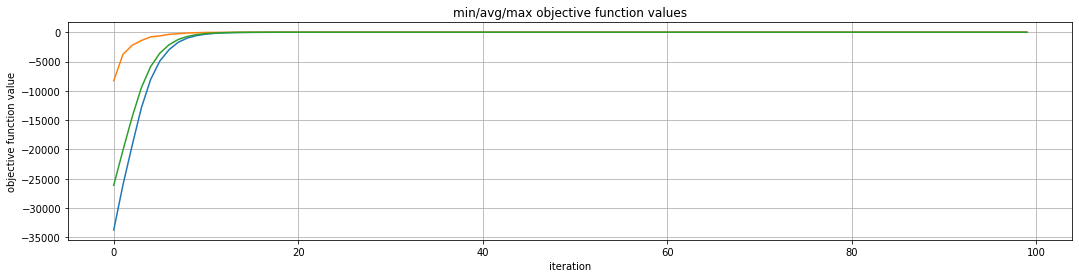

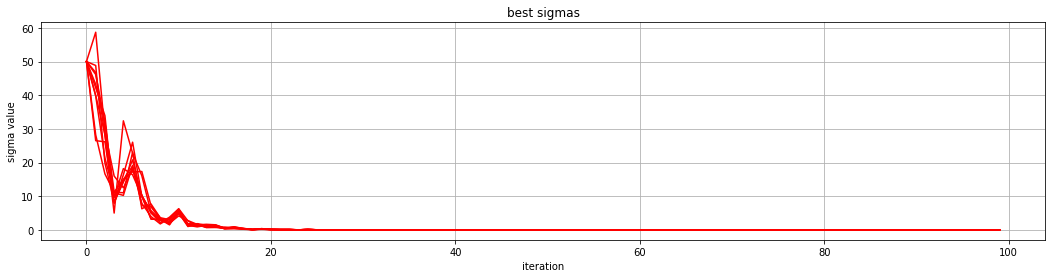

In [34]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F1, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plt.figure(figsize=(18, 4))
plt.plot(history_objective_values[:, 0])
plt.plot(history_objective_values[:, 1])
plt.plot(history_objective_values[:, 2])
plt.xlabel('iteration')
plt.ylabel('objective function value')
plt.title('min/avg/max objective function values')
plt.grid(True);
plt.show()

plt.figure(figsize=(18, 4))
plt.plot(history_best_sigmas, 'r-')
plt.xlabel('iteration')
plt.ylabel('sigma value')
plt.title('best sigmas')
plt.grid(True)
plt.show()

In [11]:
def plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas):
    plt.figure(figsize=(18, 4))
    plt.plot(history_objective_values[:, 0])
    plt.plot(history_objective_values[:, 1])
    plt.plot(history_objective_values[:, 2])
    plt.grid(True)
    plt.xlabel('iteration')
    plt.ylabel('objective function value')
    plt.title('min/avg/max objective function values')
    plt.show()

    plt.figure(figsize=(18, 4))
    plt.plot(history_best_sigmas, 'r-')
    plt.grid(True)
    plt.xlabel('iteration')
    plt.ylabel('sigma value')
    plt.title('best sigmas')
    plt.show()

### Działanie strategii ewolucyjnej dla funkcji Rastrigina F6

Iteration 0000 : best score = -7290.40488886, mean score = -26872.42595380.
Iteration 0010 : best score = -126.86248477, mean score = -353.10609879.
Iteration 0020 : best score = -23.26857466, mean score = -76.97491385.
Iteration 0030 : best score = -22.28439041, mean score = -61.04770850.
Iteration 0040 : best score = -22.28439041, mean score = -55.35796194.
Iteration 0050 : best score = -18.87060435, mean score = -51.52405492.
Iteration 0060 : best score = -18.87060435, mean score = -47.63682385.
Iteration 0070 : best score = -1.33815376, mean score = -2.72500161.
Iteration 0080 : best score = -0.99581510, mean score = -1.00006421.
Iteration 0090 : best score = -0.99496150, mean score = -0.99497117.


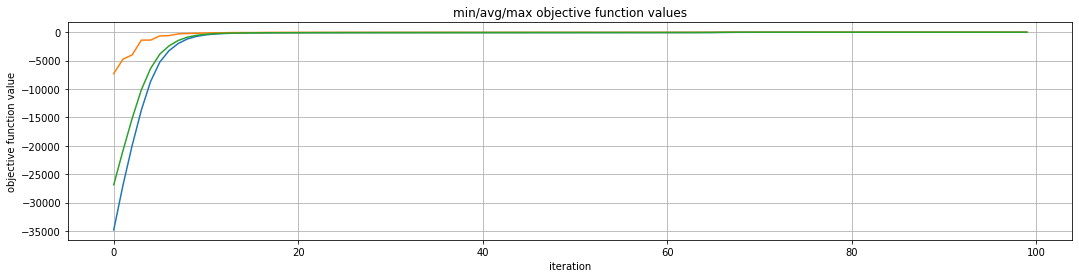

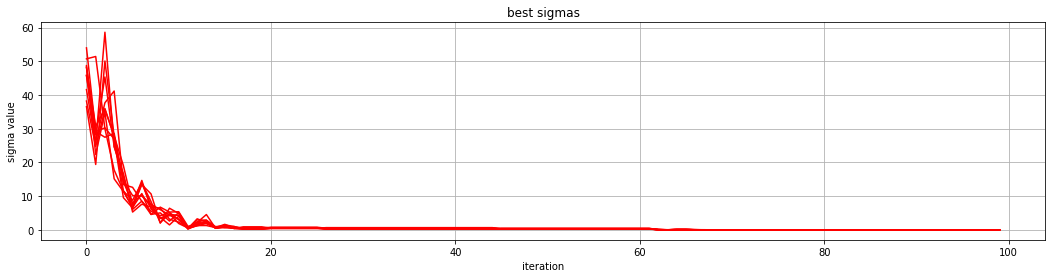

0.0

In [42]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)
best_objective_value

Iteration 0000 : best score = -27393.79107851, mean score = -60341.07592345.
Iteration 0010 : best score = -1383.49833964, mean score = -2863.29577841.
Iteration 0020 : best score = -163.02979479, mean score = -261.68310099.
Iteration 0030 : best score = -122.71177329, mean score = -174.39142100.
Iteration 0040 : best score = -96.71633622, mean score = -155.75863261.
Iteration 0050 : best score = -91.34076154, mean score = -146.61701883.
Iteration 0060 : best score = -79.49107323, mean score = -139.77678231.
Iteration 0070 : best score = -36.13079584, mean score = -59.59156725.
Iteration 0080 : best score = -16.60229307, mean score = -17.36340359.
Iteration 0090 : best score = -15.93874475, mean score = -15.97062091.


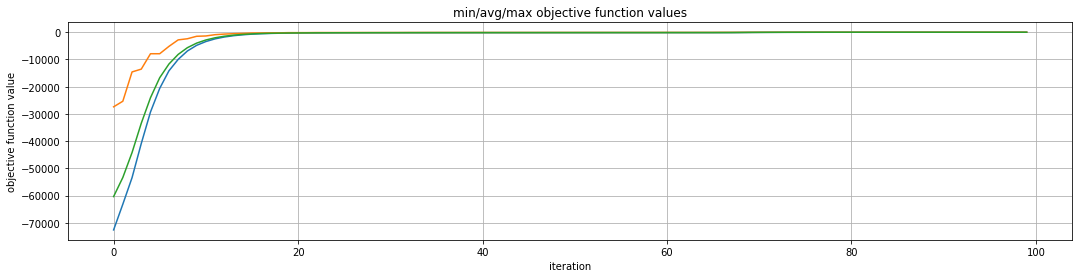

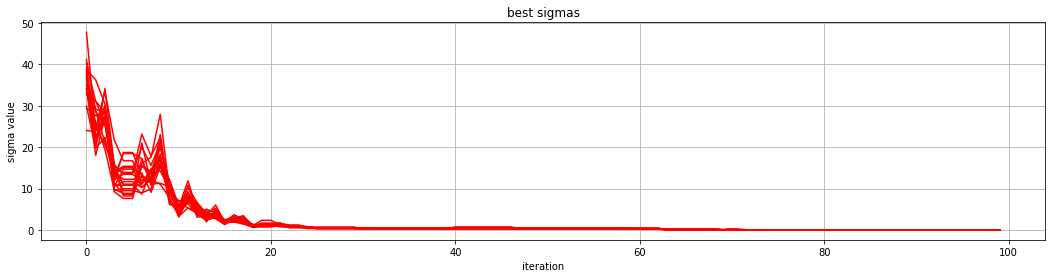

0.0

In [43]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)
best_objective_value

Iteration 0000 : best score = -105774.47022360, mean score = -161470.10951634.
Iteration 0010 : best score = -20514.59183821, mean score = -30773.95425912.
Iteration 0020 : best score = -4848.04291150, mean score = -6550.63658737.
Iteration 0030 : best score = -1420.39127526, mean score = -1858.87095962.
Iteration 0040 : best score = -649.16007523, mean score = -854.77699372.
Iteration 0050 : best score = -497.56904843, mean score = -630.04698694.
Iteration 0060 : best score = -466.75241236, mean score = -559.33029638.
Iteration 0070 : best score = -422.23888508, mean score = -524.65735398.
Iteration 0080 : best score = -418.95038453, mean score = -502.30510032.
Iteration 0090 : best score = -369.29913531, mean score = -472.42033768.


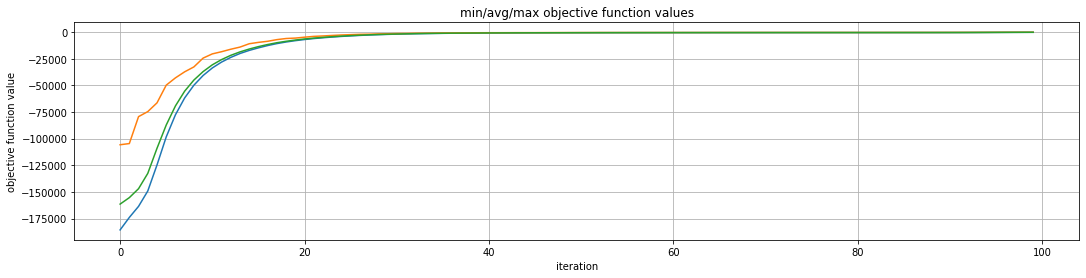

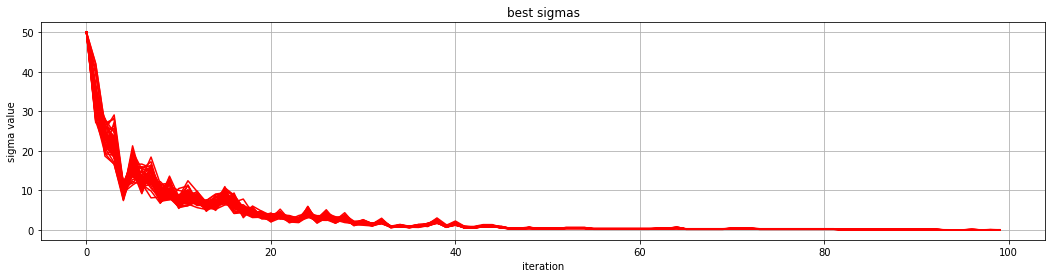

0.0

In [44]:
d = 50
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)
best_objective_value

Iteration 0000 : best score = -237038.87610969, mean score = -331364.83302521.
Iteration 0010 : best score = -102625.27206444, mean score = -124770.94866675.
Iteration 0020 : best score = -38880.00424909, mean score = -48218.87399522.
Iteration 0030 : best score = -19613.26677628, mean score = -22865.83577582.
Iteration 0040 : best score = -9969.41472929, mean score = -11548.65447955.
Iteration 0050 : best score = -5395.82255683, mean score = -6184.45809618.
Iteration 0060 : best score = -3060.30326165, mean score = -3619.29639244.
Iteration 0070 : best score = -2096.20389702, mean score = -2389.89306039.
Iteration 0080 : best score = -1589.08571346, mean score = -1812.48113179.
Iteration 0090 : best score = -1395.95537417, mean score = -1555.08742638.


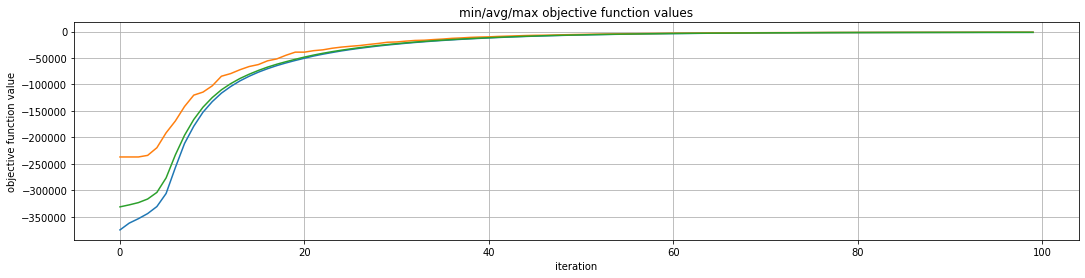

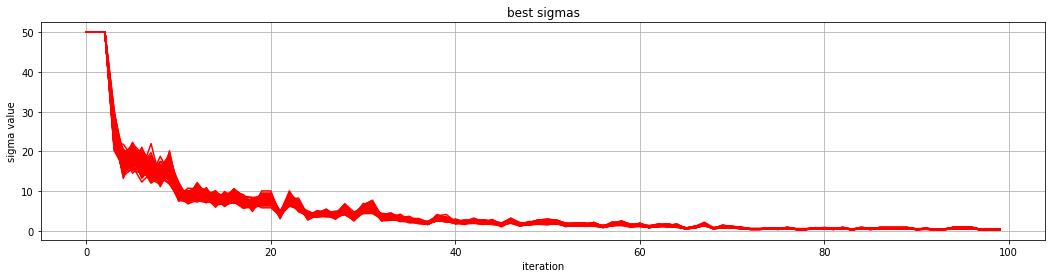

0.0

In [45]:
d = 100
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F6, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)
best_objective_value

### Działanie strategii ewolucyjnej dla funkcji Schewfela F7

Iteration 0000 : best score = -3269.60228877, mean score = -3962.39103388.
Iteration 0020 : best score = -1885.06770121, mean score = -2888.16767863.
Iteration 0040 : best score = -1539.34529300, mean score = -2507.76106919.
Iteration 0060 : best score = -567.07690697, mean score = -1045.18766889.
Iteration 0080 : best score = -434.28027399, mean score = -434.28532000.
Iteration 0100 : best score = -434.27946606, mean score = -434.27946609.
Iteration 0120 : best score = -434.27946606, mean score = -434.27946606.
Iteration 0140 : best score = -434.27946606, mean score = -434.27946606.
Iteration 0160 : best score = -434.27946606, mean score = -434.27946606.
Iteration 0180 : best score = -434.27946606, mean score = -434.27946606.
Iteration 0200 : best score = -434.27946606, mean score = -434.27946606.


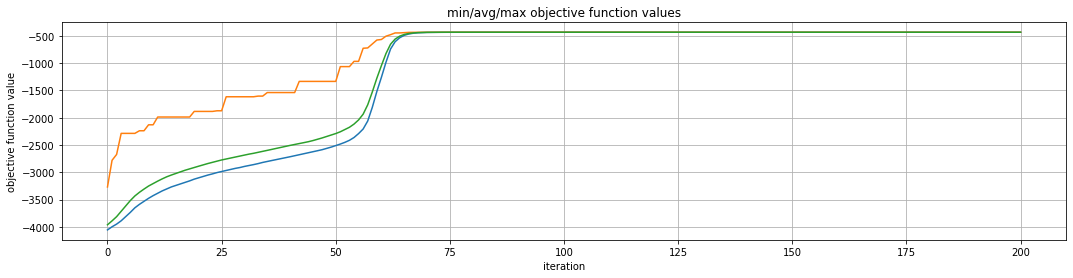

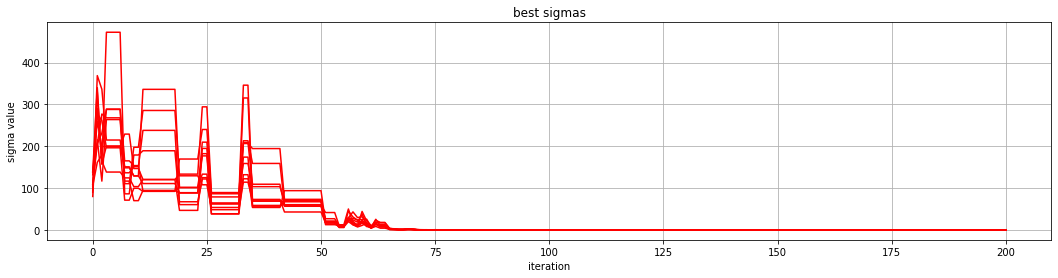

In [64]:
d = 10
N = 2000
T = 201

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 20, -500, 500)


# print(best_objective_value, best_chromosome)
plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -3460.85527959, mean score = -3990.05422105.
Iteration 0020 : best score = -1868.85193027, mean score = -3093.47317191.
Iteration 0040 : best score = -1590.09523833, mean score = -2555.65991165.
Iteration 0060 : best score = -828.73008595, mean score = -2111.14207602.
Iteration 0080 : best score = -34.12595800, mean score = -186.21078848.
Iteration 0100 : best score = -0.07452675, mean score = -0.59550260.
Iteration 0120 : best score = -0.00052627, mean score = -0.00205494.
Iteration 0140 : best score = -0.00012780, mean score = -0.00013286.
Iteration 0160 : best score = -0.00012728, mean score = -0.00012729.
Iteration 0180 : best score = -0.00012728, mean score = -0.00012728.
0.0 [[ 52.08363624  77.1653496  102.24706295 127.32877631 152.41048966
  177.49220302 202.57391637 227.65562973 252.73734308 255.64      ]]


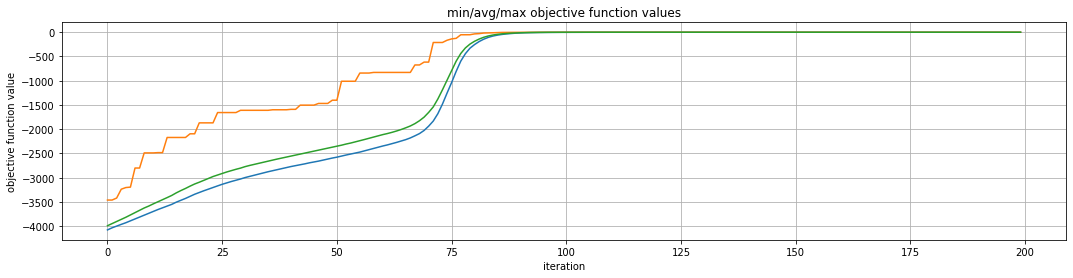

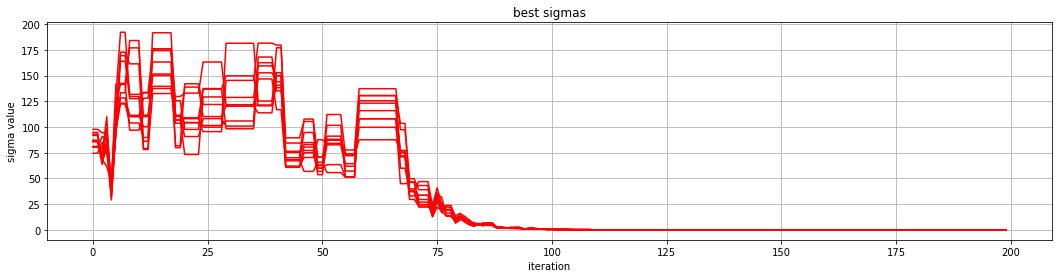

In [40]:
d = 10
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.5/np.sqrt(2*d), 0.5/np.sqrt(2*np.sqrt(d)), 20, -500, 500)


print(best_objective_value, best_chromosome)
plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -3460.85527959, mean score = -3990.05422105.
Iteration 0020 : best score = -1868.85193027, mean score = -3093.47317191.
Iteration 0040 : best score = -1590.09523833, mean score = -2555.65991165.
Iteration 0060 : best score = -828.73008595, mean score = -2111.14207602.
Iteration 0080 : best score = -34.12595800, mean score = -186.21078848.
Iteration 0100 : best score = -0.07452675, mean score = -0.59550260.
Iteration 0120 : best score = -0.00052627, mean score = -0.00205494.
Iteration 0140 : best score = -0.00012780, mean score = -0.00013286.
Iteration 0160 : best score = -0.00012728, mean score = -0.00012729.
Iteration 0180 : best score = -0.00012728, mean score = -0.00012728.
0.0 [[ 52.08363624  77.1653496  102.24706295 127.32877631 152.41048966
  177.49220302 202.57391637 227.65562973 252.73734308 255.64      ]]


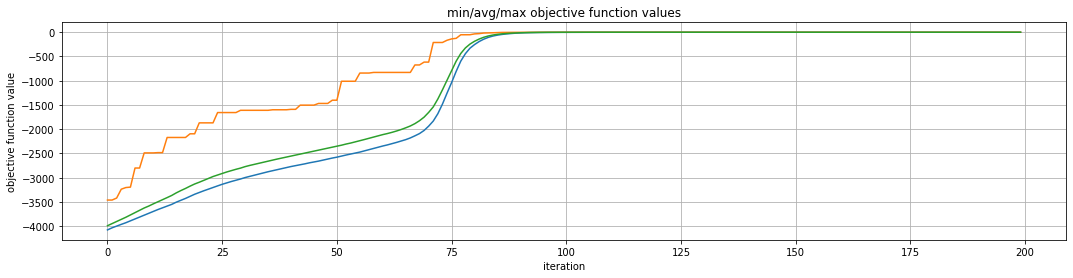

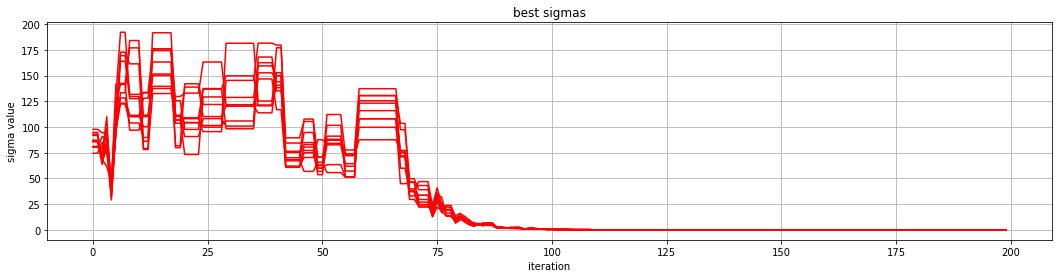

In [ ]:
d = 10
N = 2000
T = 200

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.5/np.sqrt(2*d), 0.5/np.sqrt(2*np.sqrt(d)), 20, -500, 500)


print(best_objective_value, best_chromosome)
plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -3612.02689549, mean score = -3990.28685002.
Iteration 0020 : best score = -2733.18065573, mean score = -3407.74245125.
Iteration 0040 : best score = -2168.82347161, mean score = -3090.20690502.
Iteration 0060 : best score = -1583.60050943, mean score = -2739.98315192.
Iteration 0080 : best score = -759.92270614, mean score = -2006.69675592.
Iteration 0100 : best score = -428.06984442, mean score = -1244.30099185.
Iteration 0120 : best score = -22.26385846, mean score = -203.04314162.
Iteration 0140 : best score = -4.39025432, mean score = -23.49358759.
Iteration 0160 : best score = -0.53259223, mean score = -3.44754079.
Iteration 0180 : best score = -0.08432119, mean score = -0.42984192.
Iteration 0200 : best score = -0.00860756, mean score = -0.05298364.
Iteration 0220 : best score = -0.00128802, mean score = -0.00700787.


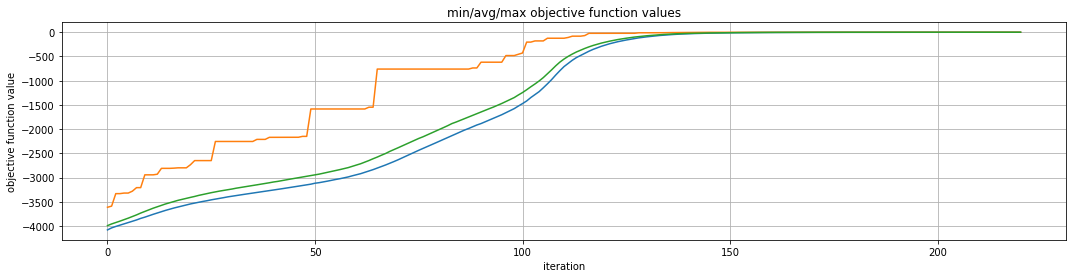

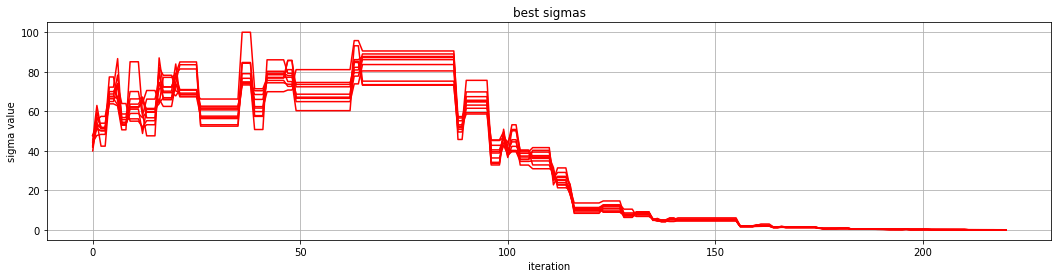

In [49]:
d = 10
N = 2000
T = 221

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.3/np.sqrt(2*d), 0.3/np.sqrt(2*np.sqrt(d)), 20, -500, 500)


# print(best_objective_value, best_chromosome)
plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -7523.35146751, mean score = -8050.69419366.
Iteration 0050 : best score = -4812.38810067, mean score = -6287.16617497.
Iteration 0100 : best score = -4049.07709208, mean score = -5637.57250112.
Iteration 0150 : best score = -1590.12375198, mean score = -2977.78813205.
Iteration 0200 : best score = -789.62877783, mean score = -789.63181525.
Iteration 0250 : best score = -789.62749865, mean score = -789.62749866.
Iteration 0300 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0350 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0400 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0450 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0500 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0550 : best score = -789.62749865, mean score = -789.62749865.
Iteration 0600 : best score = -789.62749865, mean score = -789.62749865.


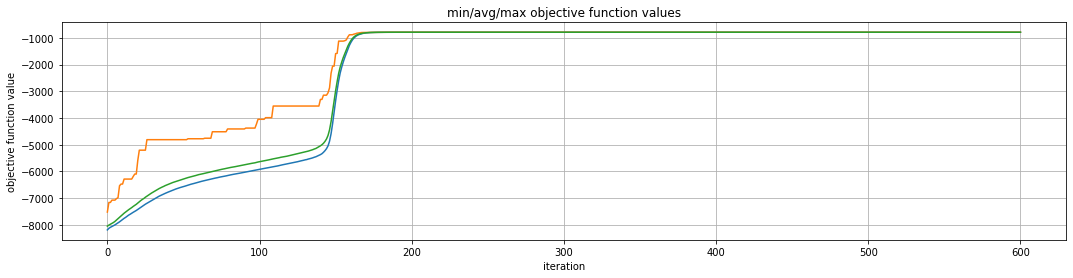

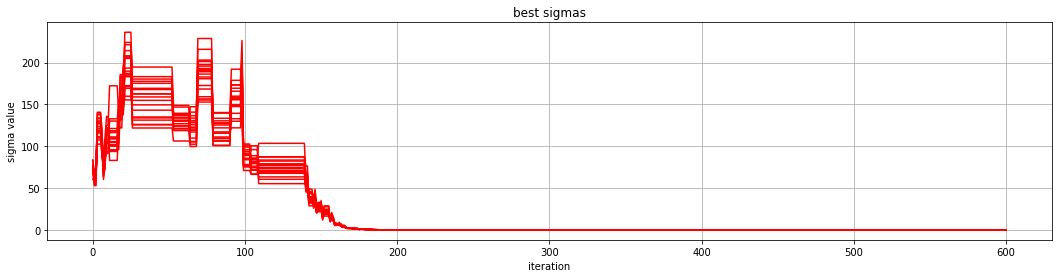

In [51]:
d = 20
N = 2000
T = 601

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.5/np.sqrt(2*d), 0.5/np.sqrt(2*np.sqrt(d)), 50, -500, 500)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -19494.34647549, mean score = -20279.45532144.
Iteration 0050 : best score = -16756.79959507, mean score = -18706.59966379.
Iteration 0100 : best score = -15947.97642106, mean score = -17860.86408136.
Iteration 0150 : best score = -15301.11540148, mean score = -17510.35319569.
Iteration 0200 : best score = -15301.11540148, mean score = -17306.95763795.
Iteration 0250 : best score = -15301.11540148, mean score = -17145.32284327.
Iteration 0300 : best score = -15301.11540148, mean score = -17016.36426894.
Iteration 0350 : best score = -15271.23595973, mean score = -16906.23199697.
Iteration 0400 : best score = -15271.23595973, mean score = -16811.18193148.
Iteration 0450 : best score = -15271.23595973, mean score = -16729.34393614.
Iteration 0500 : best score = -14974.74010088, mean score = -16651.26584400.
Iteration 0550 : best score = -14974.74010088, mean score = -16573.87505732.
Iteration 0600 : best score = -14974.74010088, mean score = -16510.28071982.

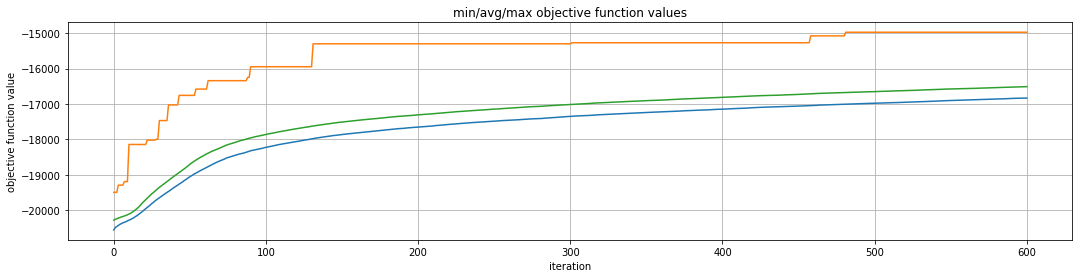

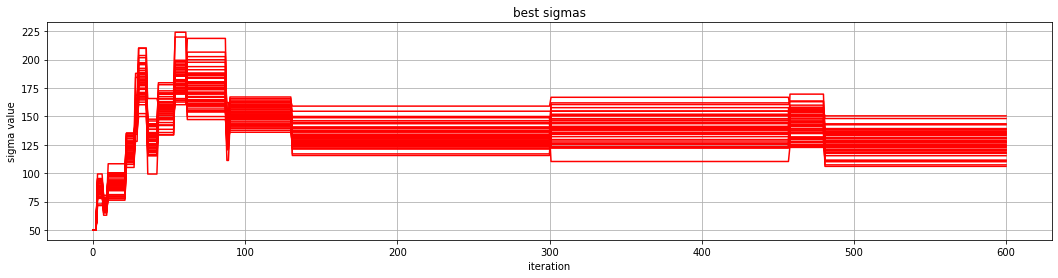

In [52]:
d = 50
N = 2000
T = 601

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.5/np.sqrt(2*d), 0.5/np.sqrt(2*np.sqrt(d)), 50, -500, 500)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -39526.20444537, mean score = -40622.72810755.
Iteration 0050 : best score = -39021.97274897, mean score = -40418.43347665.
Iteration 0100 : best score = -36682.02893193, mean score = -39415.87012434.
Iteration 0150 : best score = -35905.71462907, mean score = -38578.20035766.
Iteration 0200 : best score = -35481.16900623, mean score = -37870.03144029.
Iteration 0250 : best score = -34445.87008635, mean score = -37478.09338148.
Iteration 0300 : best score = -34445.87008635, mean score = -37226.64523212.
Iteration 0350 : best score = -34445.87008635, mean score = -37029.98053510.
Iteration 0400 : best score = -34445.87008635, mean score = -36873.52871772.
Iteration 0450 : best score = -34435.75977822, mean score = -36752.85190638.
Iteration 0500 : best score = -34435.75977822, mean score = -36643.41261200.
Iteration 0550 : best score = -34316.28174104, mean score = -36549.90744156.
Iteration 0600 : best score = -34314.16935405, mean score = -36459.94710009.

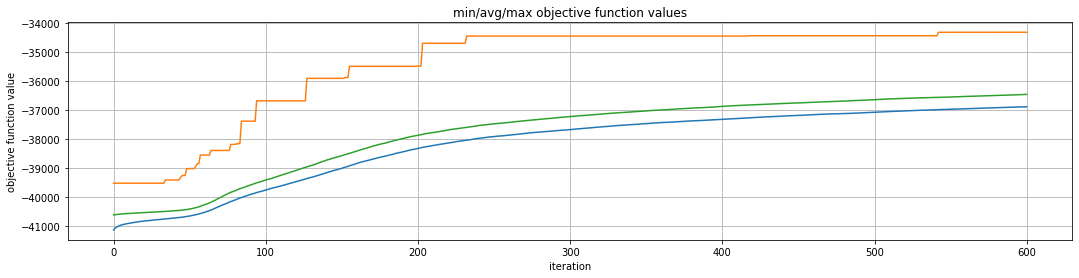

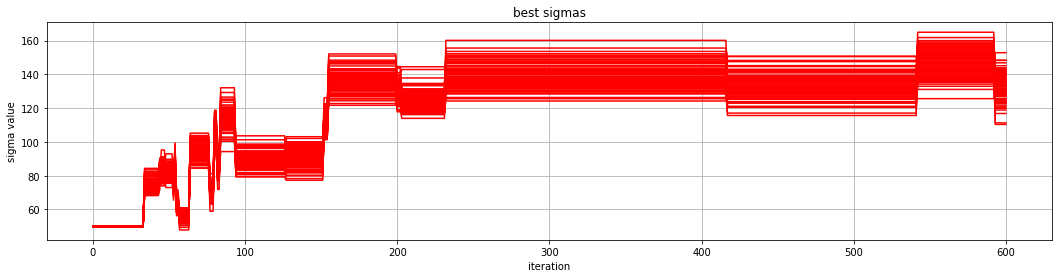

In [65]:
d = 100
N = 2000
T = 601

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F7, d, N, T, 2*N, 2, 50.0, 0.5/np.sqrt(2*d), 0.5/np.sqrt(2*np.sqrt(d)), 50, -500, 500)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

### Działanie strategii ewolucyjnej dla funkcji Griewanka F8

Iteration 0000 : best score = -2.86520639, mean score = -7.58417708.
Iteration 0010 : best score = -0.61586055, mean score = -1.05157800.
Iteration 0020 : best score = -0.05022038, mean score = -0.33146934.
Iteration 0030 : best score = -0.00031604, mean score = -0.00139364.
Iteration 0040 : best score = -0.00000130, mean score = -0.00000700.
Iteration 0050 : best score = -0.00000001, mean score = -0.00000003.
Iteration 0060 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0070 : best score = -0.00000000, mean score = -0.00000000.
Iteration 0080 : best score = 0.00000000, mean score = -0.00000000.
Iteration 0090 : best score = 0.00000000, mean score = 0.00000000.


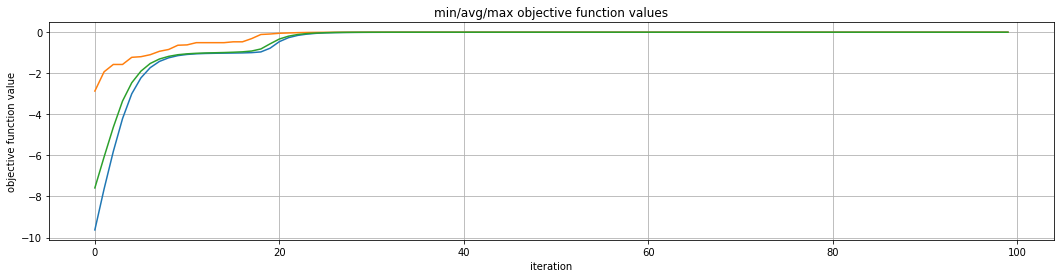

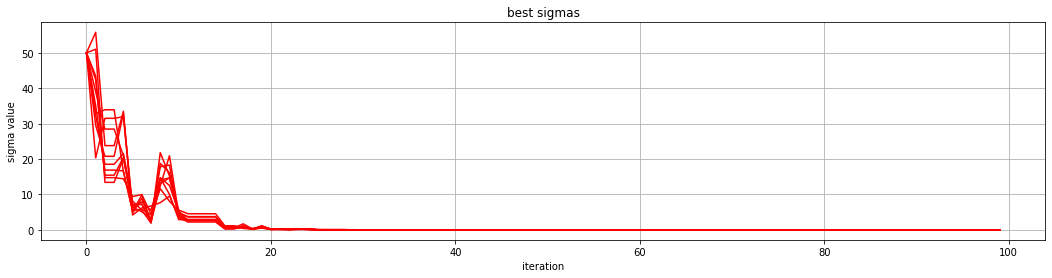

In [37]:
d = 10
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -6.09550103, mean score = -15.97408589.
Iteration 0010 : best score = -1.22845807, mean score = -1.60761039.
Iteration 0020 : best score = -0.76061880, mean score = -1.00793211.
Iteration 0030 : best score = -0.07888428, mean score = -0.14831808.
Iteration 0040 : best score = -0.00784986, mean score = -0.01437732.
Iteration 0050 : best score = -0.00116276, mean score = -0.00216938.
Iteration 0060 : best score = -0.00015251, mean score = -0.00029573.
Iteration 0070 : best score = -0.00001334, mean score = -0.00002561.
Iteration 0080 : best score = -0.00000145, mean score = -0.00000262.
Iteration 0090 : best score = -0.00000009, mean score = -0.00000021.


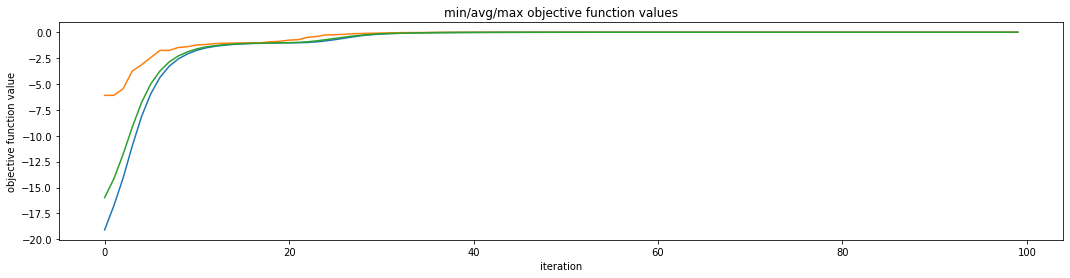

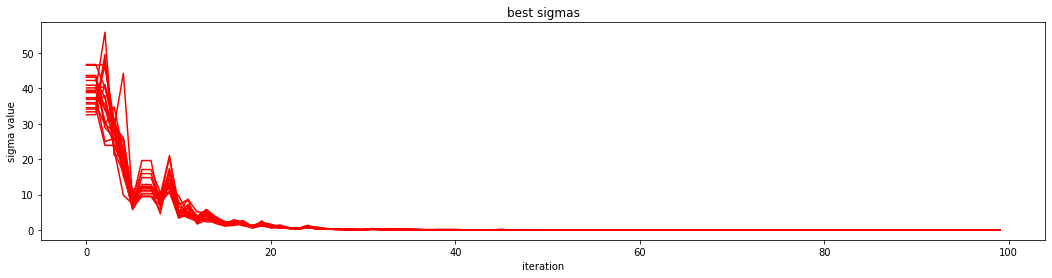

In [31]:
d = 20
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -23.78557633, mean score = -41.47140928.
Iteration 0010 : best score = -5.69384646, mean score = -8.27939901.
Iteration 0020 : best score = -1.96783630, mean score = -2.34678866.
Iteration 0030 : best score = -1.20102159, mean score = -1.29046987.
Iteration 0040 : best score = -1.04496841, mean score = -1.06543162.
Iteration 0050 : best score = -0.67074585, mean score = -0.81855047.
Iteration 0060 : best score = -0.39035094, mean score = -0.44340942.
Iteration 0070 : best score = -0.22240166, mean score = -0.25068860.
Iteration 0080 : best score = -0.13174698, mean score = -0.15109072.
Iteration 0090 : best score = -0.08051144, mean score = -0.09207487.


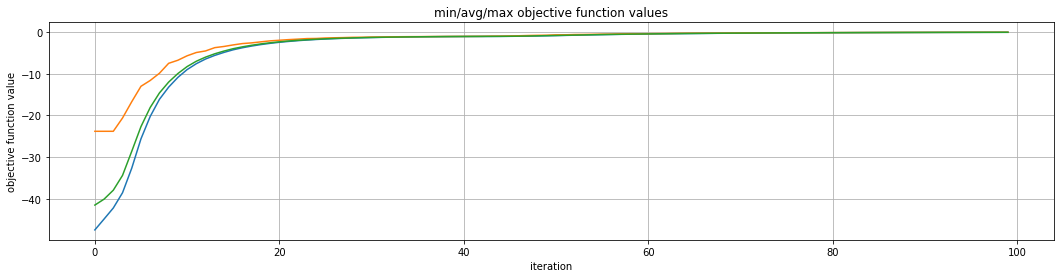

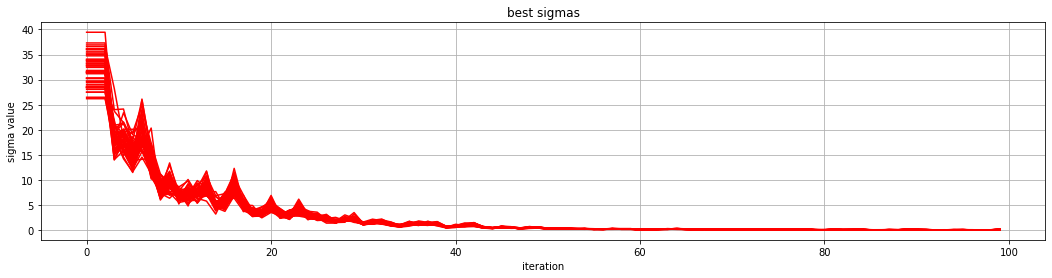

In [38]:
d = 50
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)

plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)

Iteration 0000 : best score = -59.98285288, mean score = -83.65915711.
Iteration 0010 : best score = -25.26940521, mean score = -32.11777122.
Iteration 0020 : best score = -10.77277510, mean score = -12.55193408.
Iteration 0030 : best score = -5.82841985, mean score = -6.50032772.
Iteration 0040 : best score = -3.09041375, mean score = -3.58813042.
Iteration 0050 : best score = -2.01240073, mean score = -2.22456091.
Iteration 0060 : best score = -1.49723731, mean score = -1.58721004.
Iteration 0070 : best score = -1.25338618, mean score = -1.30168917.
Iteration 0080 : best score = -1.12539051, mean score = -1.14862628.
Iteration 0090 : best score = -1.06264464, mean score = -1.07370852.
[[50.         50.         50.         21.32676777 12.66986268 12.66986268
  21.0689456  11.71660366 13.47608215 12.2931014  14.12467359  6.38827624
  10.15354007  9.35315904  7.29929872  9.20555769  5.51695581  5.01005538
   6.29535776  9.55283849  5.26900919  5.76276323  6.39604667  4.53629449
   4.288

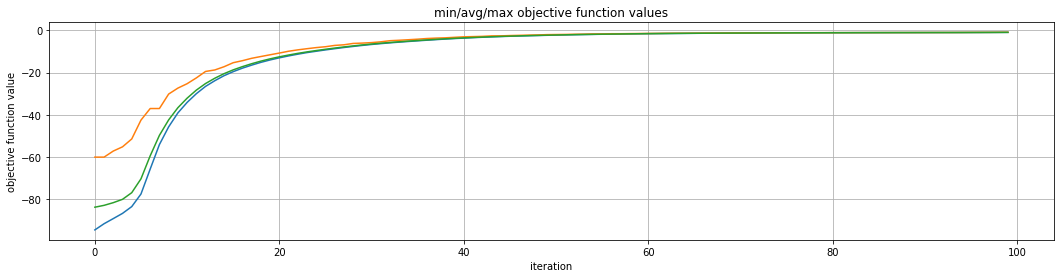

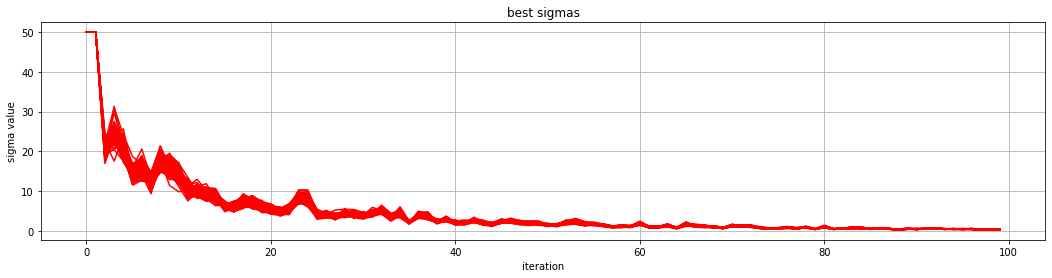

In [41]:
d = 100
N = 2000
T = 100

best_objective_value, best_chromosome, history_objective_values, history_best_chromosome, history_best_sigmas = es(
    objective_function_F8, d, N, T, 2*N, 2, 50.0, 1/np.sqrt(2*d), 1/np.sqrt(2*np.sqrt(d)), 10)


print(best_chromosome)
print(best_objective_value)
plot_min_max_mean_sigmas(history_objective_values, history_best_sigmas)